In [1]:
from google.colab import userdata
x=userdata.get('ROBOFLOW_API_KEY')

In [2]:
x

'WNpUQdnLsLAnl4CJTyss'

In [3]:
!nvidia-smi

Sun Nov 17 07:56:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [6]:
!pip install -U roboflow

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow


/content/datasets


In [8]:
HOME

'/content'

In [9]:
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

In [10]:
workspace = rf.workspace()  # Get the default workspace

print(workspace)

loading Roboflow workspace...
{
  "name": "Harshit Pant",
  "url": "harshit-pant-r7us2",
  "projects": [
    "harshit-pant-r7us2/aerial-detection-7zho6",
    "harshit-pant-r7us2/hard-hat-sample-khjmp",
    "harshit-pant-r7us2/test1-pdz63"
  ]
}


In [11]:
workspace = rf.workspace("harshit-pant-r7us2")

loading Roboflow workspace...


In [12]:
project = workspace.project("test1-pdz63")

loading Roboflow project...


In [13]:
version = project.version(2)

In [14]:
version

In [15]:
dataset = version.download("yolov11")


Extracting Dataset Version Zip to test1-2 in yolov11:: 100%|██████████| 3432/3432 [00:00<00:00, 5230.99it/s]


In [16]:
HOME

'/content'

In [20]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11l.pt data={dataset.location}/data.yaml epochs=30 imgsz=480 batch=16 plots=True

/content
100% 49.0M/49.0M [00:01<00:00, 34.5MB/s]
Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/datasets/test1-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

In [21]:
!ls /content/runs/detect/train2

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1731831113.bce535a9814e.4270.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1500.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1501.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1502.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


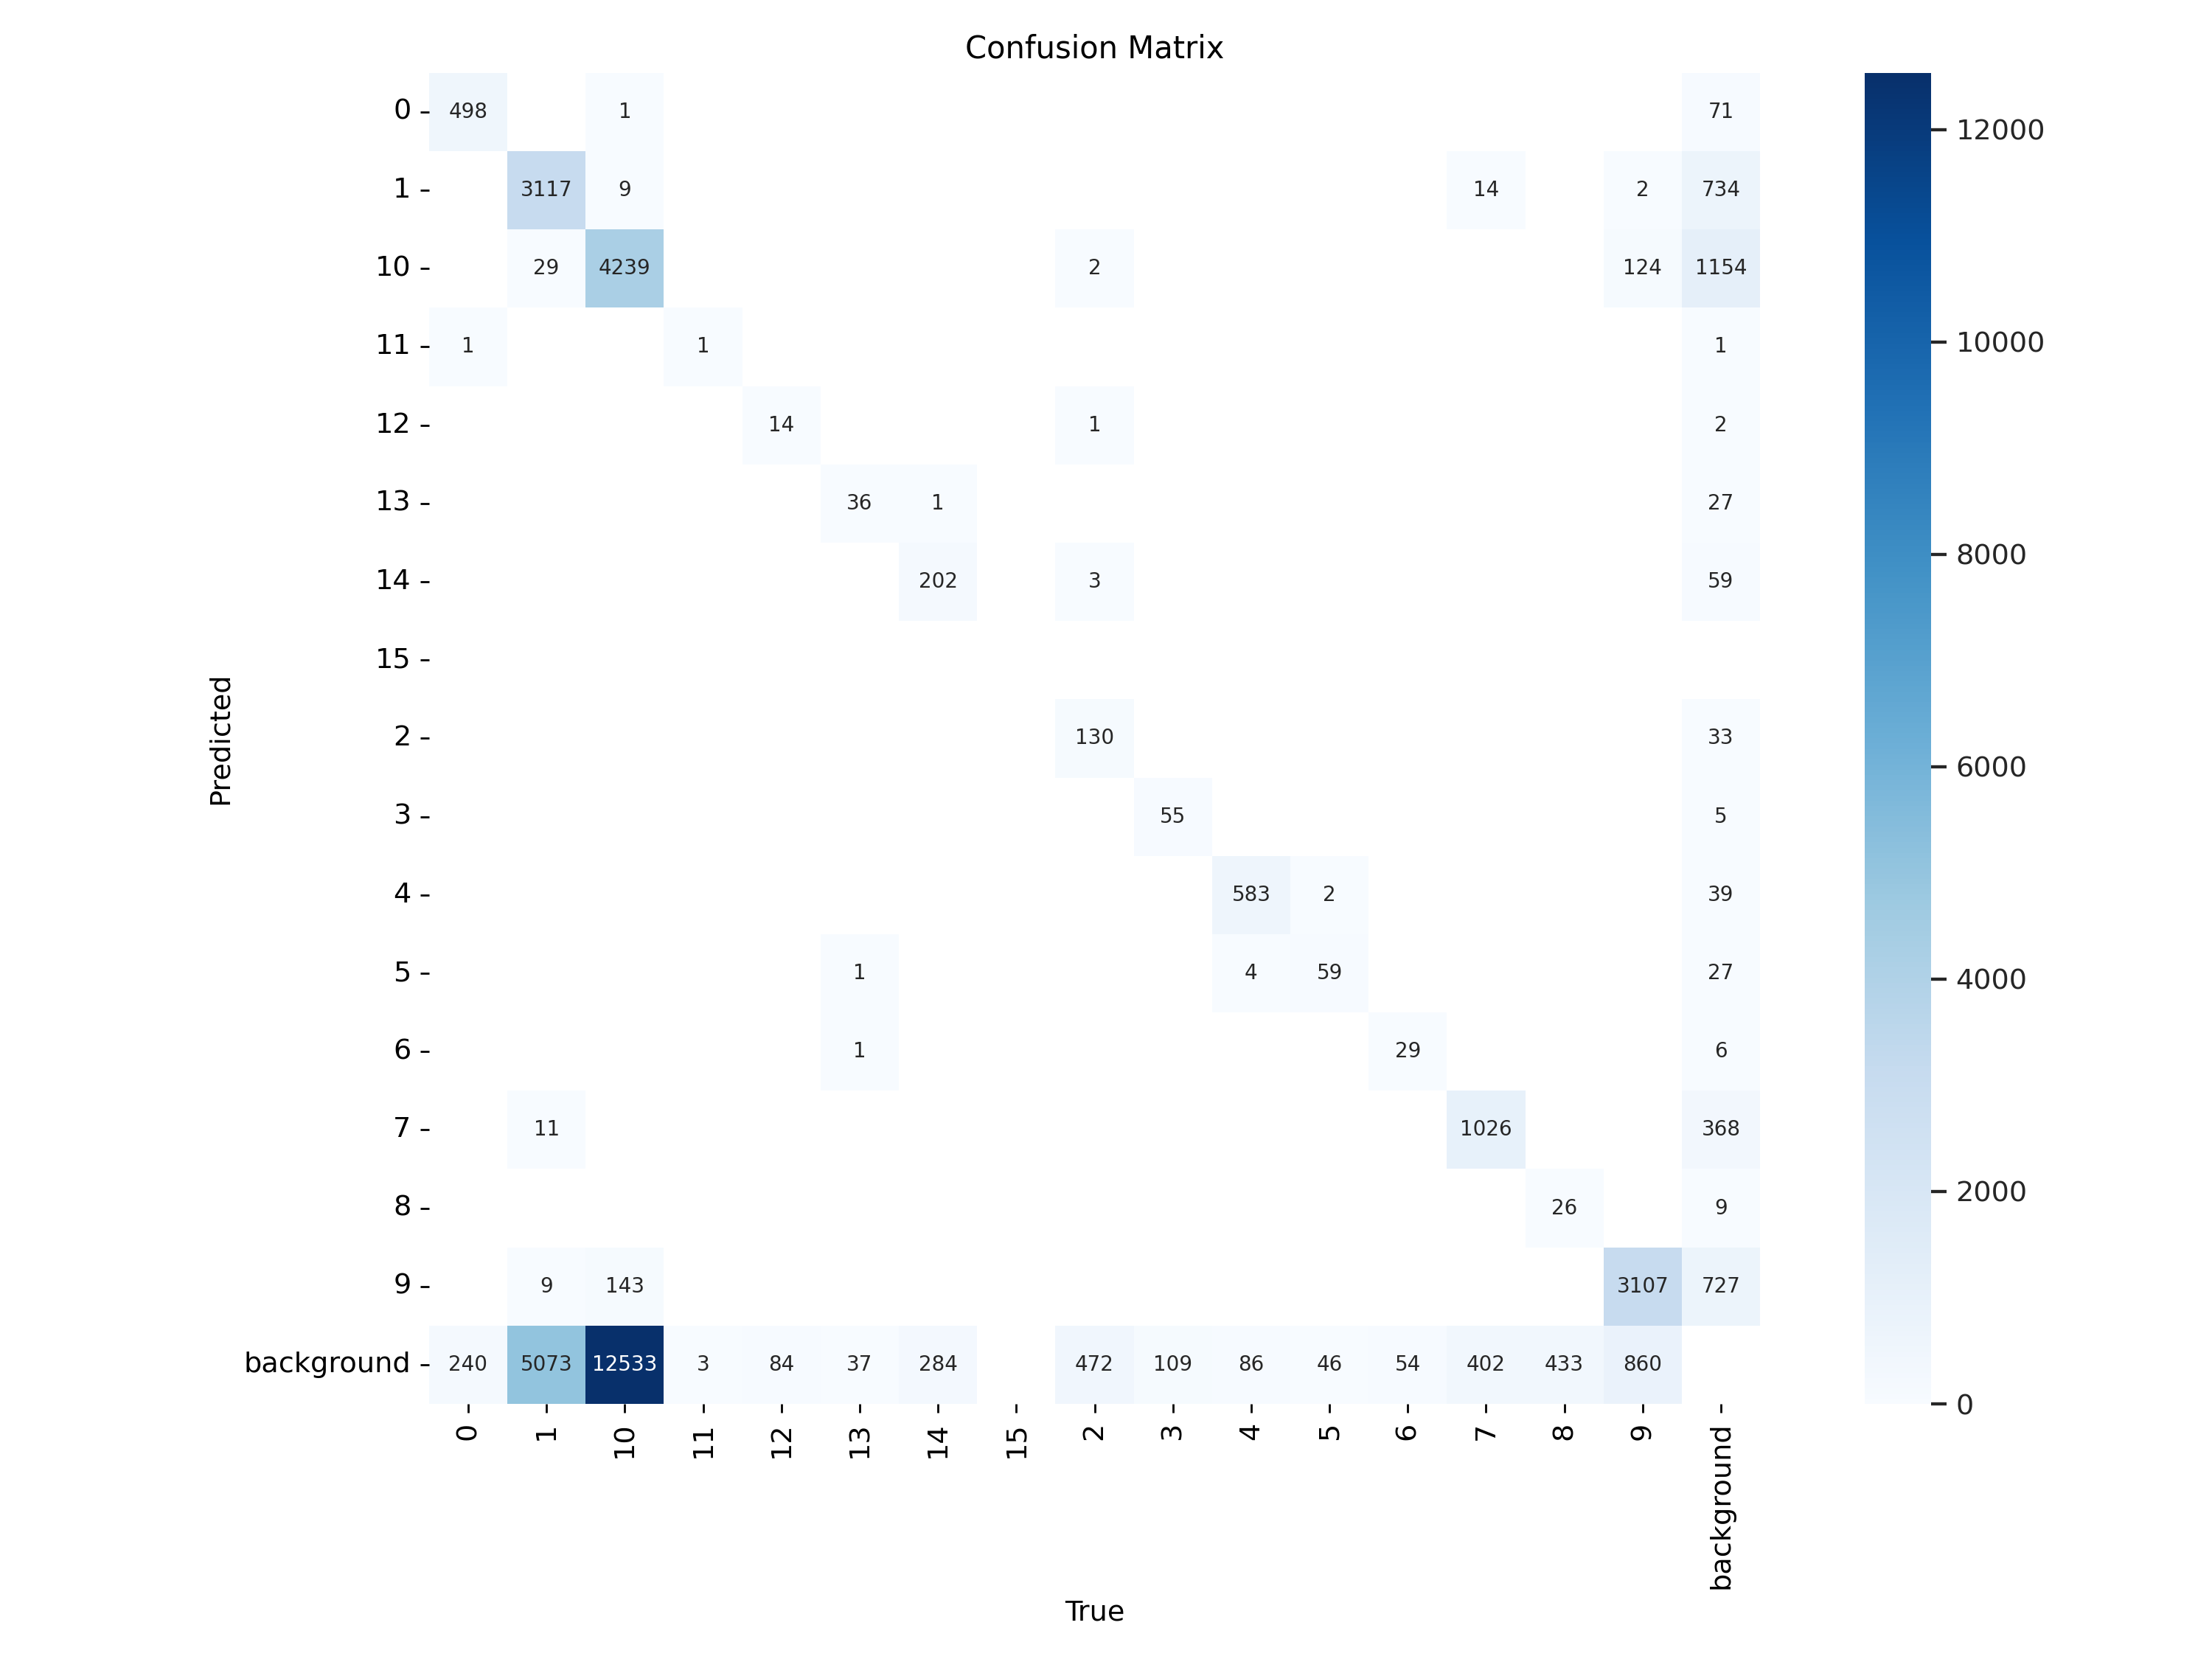

In [22]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=1000)

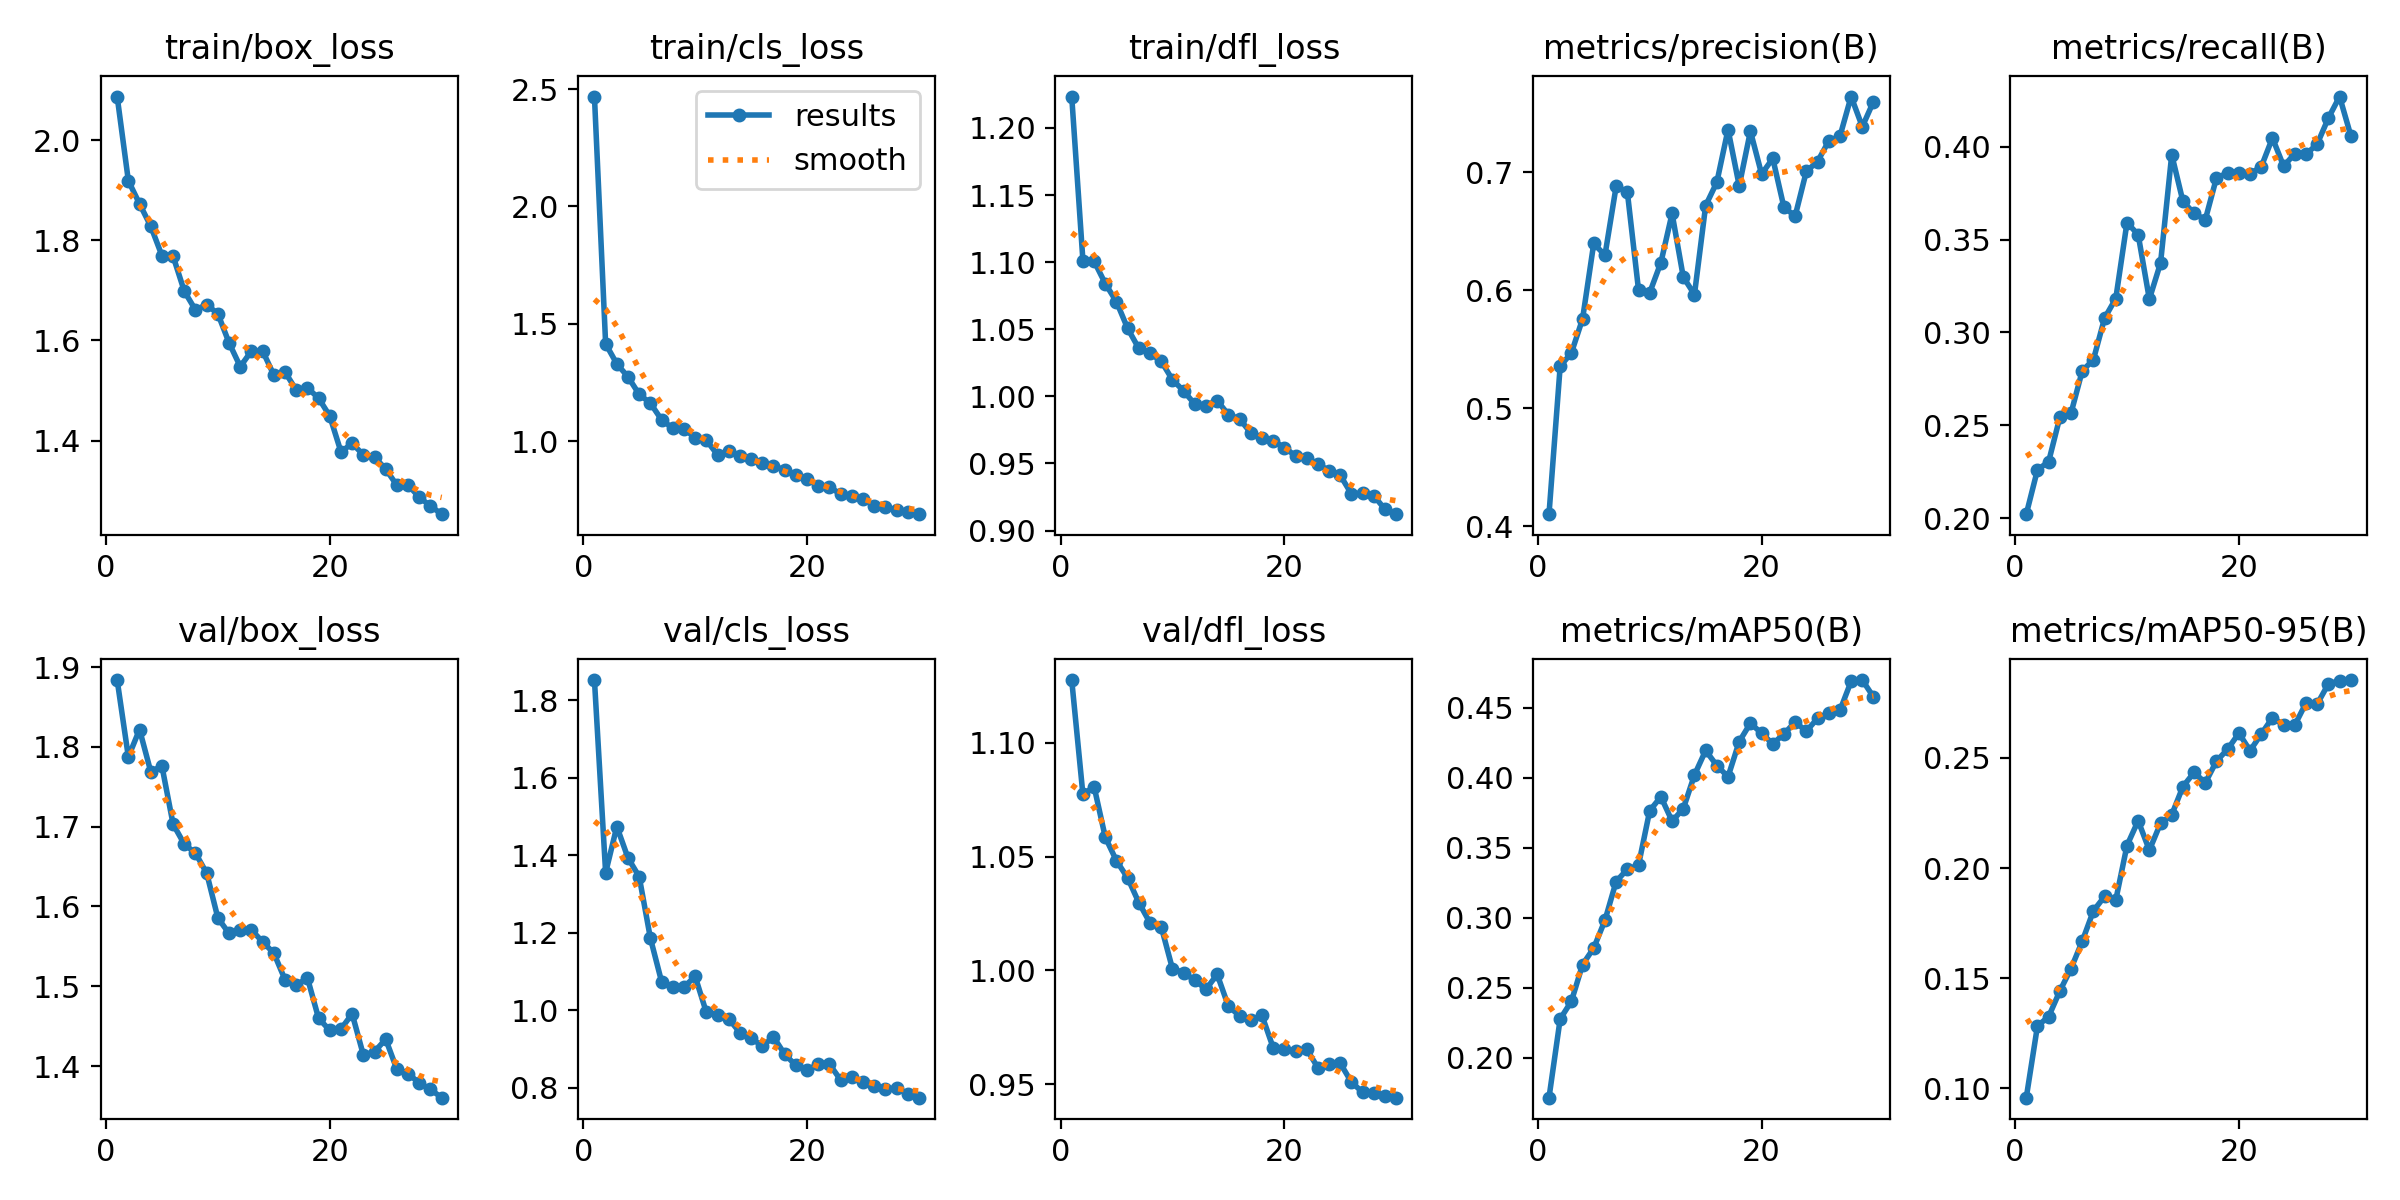

In [23]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train2/results.png', width=900)

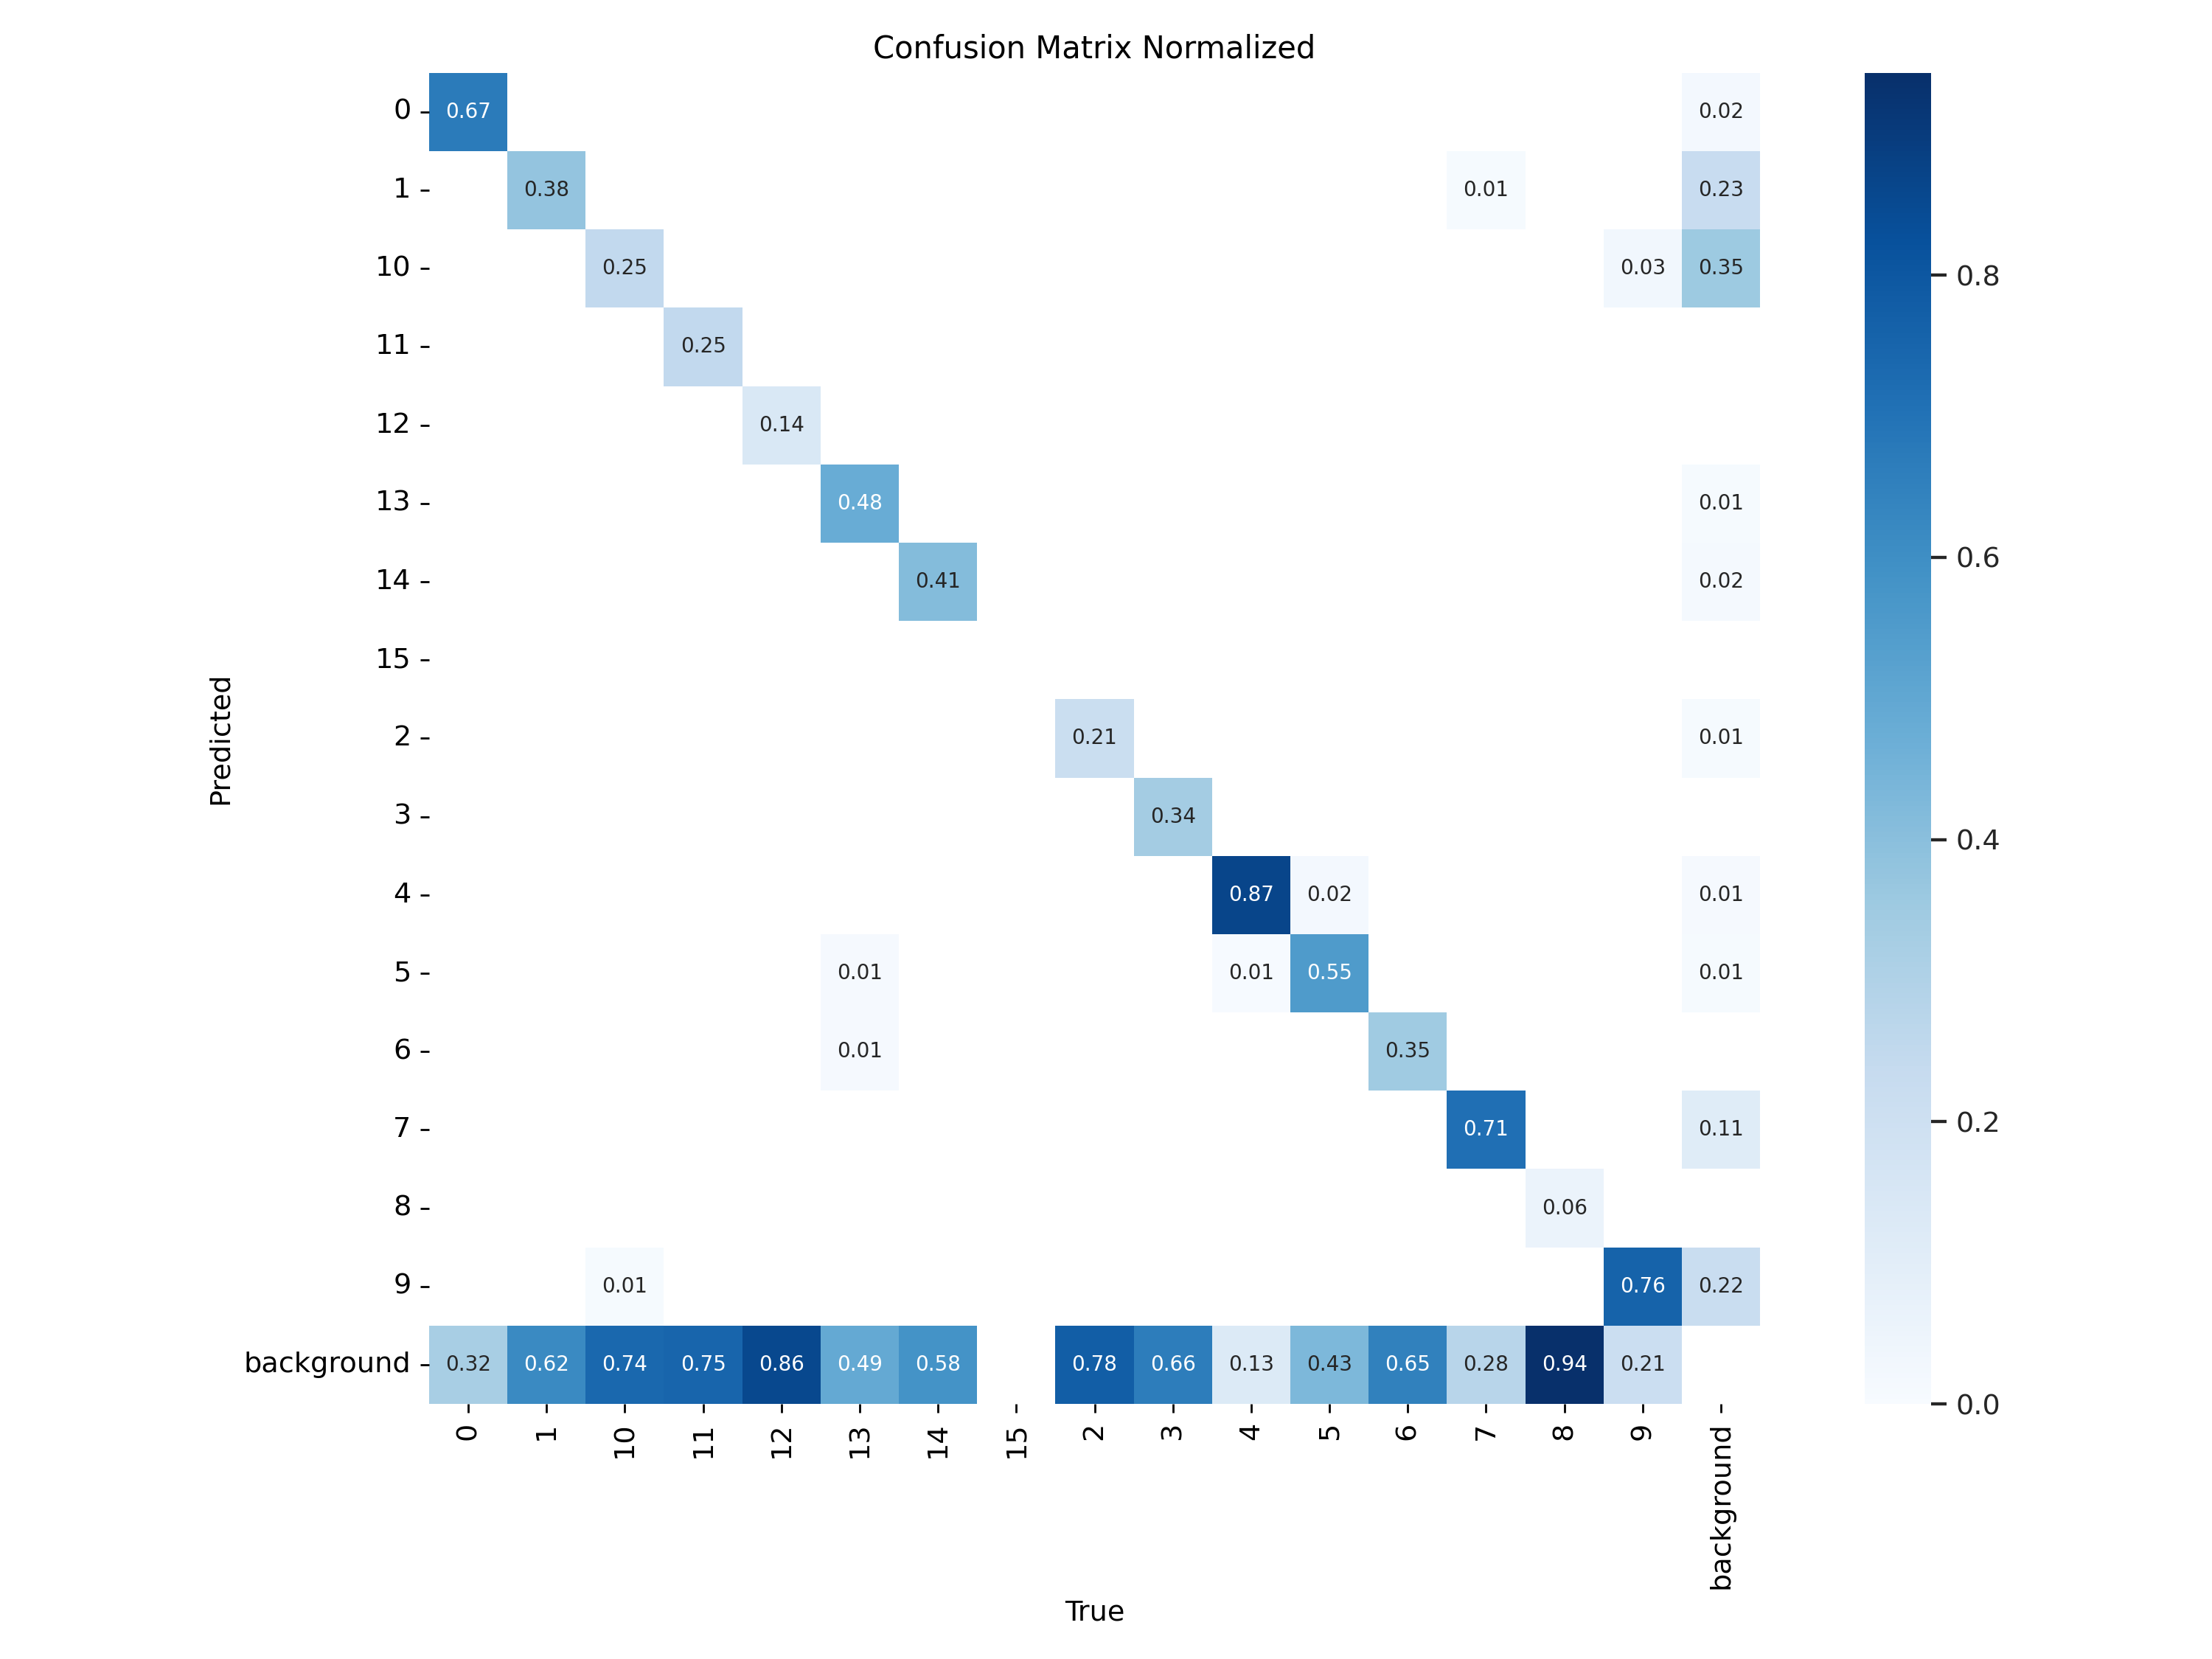

In [33]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train2/confusion_matrix_normalized.png', width=800)

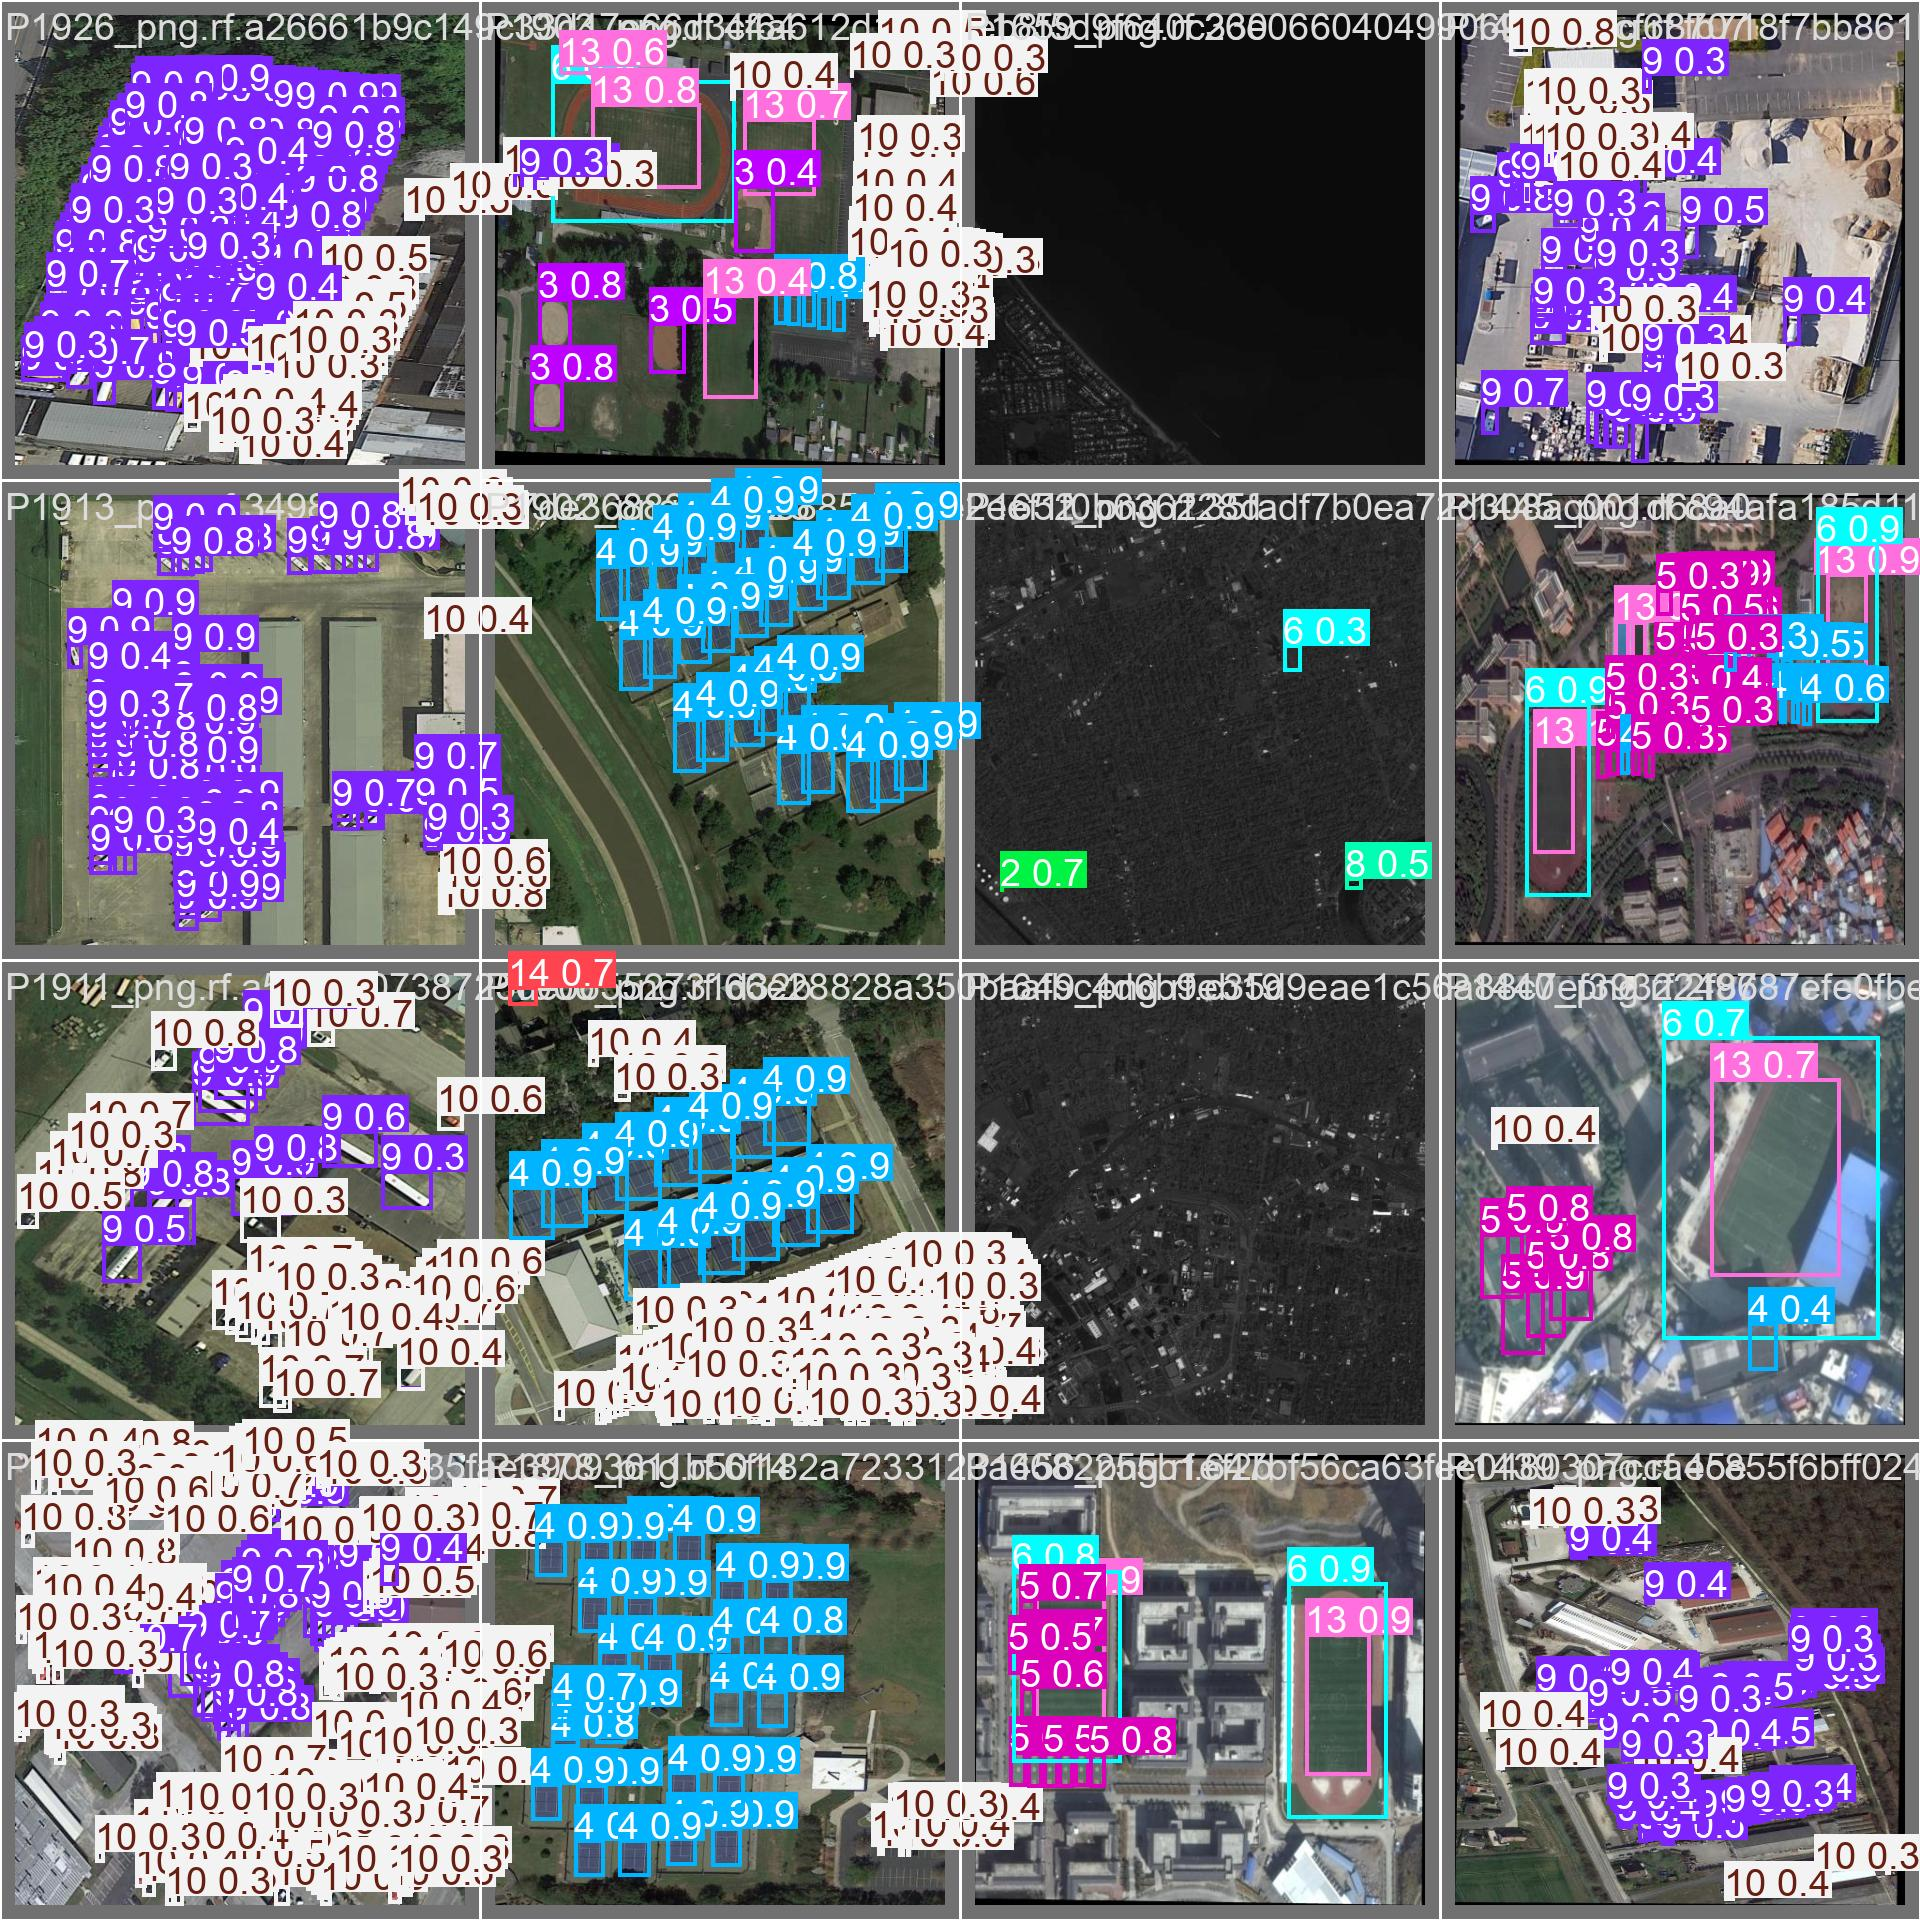

In [26]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train2/val_batch1_pred.jpg', width=500)

In [36]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,291,648 parameters, 0 gradients, 86.6 GFLOPs
val: Scanning /content/datasets/test1-2/valid/labels.cache... 342 images, 0 backgrounds, 0 corrupt: 100% 342/342 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/test1-2/valid/images/P1305_png.rf.3d1b32d850e54fea8906c74d8bd269e2.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:14<00:00,  1.50it/s]
                   all        342      34196      0.736      0.427      0.469      0.285
                     0         37        739      0.869      0.667      0.711      0.418
                     1        111       8239      0.784      0.363      0.458      0.234
                    10        220      16925      0.758      0.242      0.334      0.167
                    11          2          4      0.329       0.25      0.247     0.0251

In [37]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,291,648 parameters, 0 gradients, 86.6 GFLOPs

image 1/172 /content/datasets/test1-2/test/images/P0060_png.rf.63d4010e5619ec34940d79c147555639.jpg: 480x480 43 14s, 30.3ms
image 2/172 /content/datasets/test1-2/test/images/P0063_png.rf.226dd55b5dba50a3c3e0e67435d6ecac.jpg: 480x480 68 14s, 30.3ms
image 3/172 /content/datasets/test1-2/test/images/P0117_png.rf.2a3911c5b973d08d2f2eafb98bb66716.jpg: 480x480 2 10s, 2 3s, 1 5, 30.3ms
image 4/172 /content/datasets/test1-2/test/images/P0122_png.rf.72e14a31c15ca54190dcbcdf3b96918d.jpg: 480x480 57 10s, 1 13, 2 3s, 30.3ms
image 5/172 /content/datasets/test1-2/test/images/P0171_png.rf.9e795900d51416fb4bf8b6eea3cfbd24.jpg: 480x480 18 0s, 33 10s, 3 9s, 30.3ms
image 6/172 /content/datasets/test1-2/test/images/P0173_png.rf.f0bf1c267916ed5295772de66687b3b8.jpg: 480x480 8 0s, 1 10, 6 9s, 30.3ms
image 7/172 /content/datasets/test1-2/test/

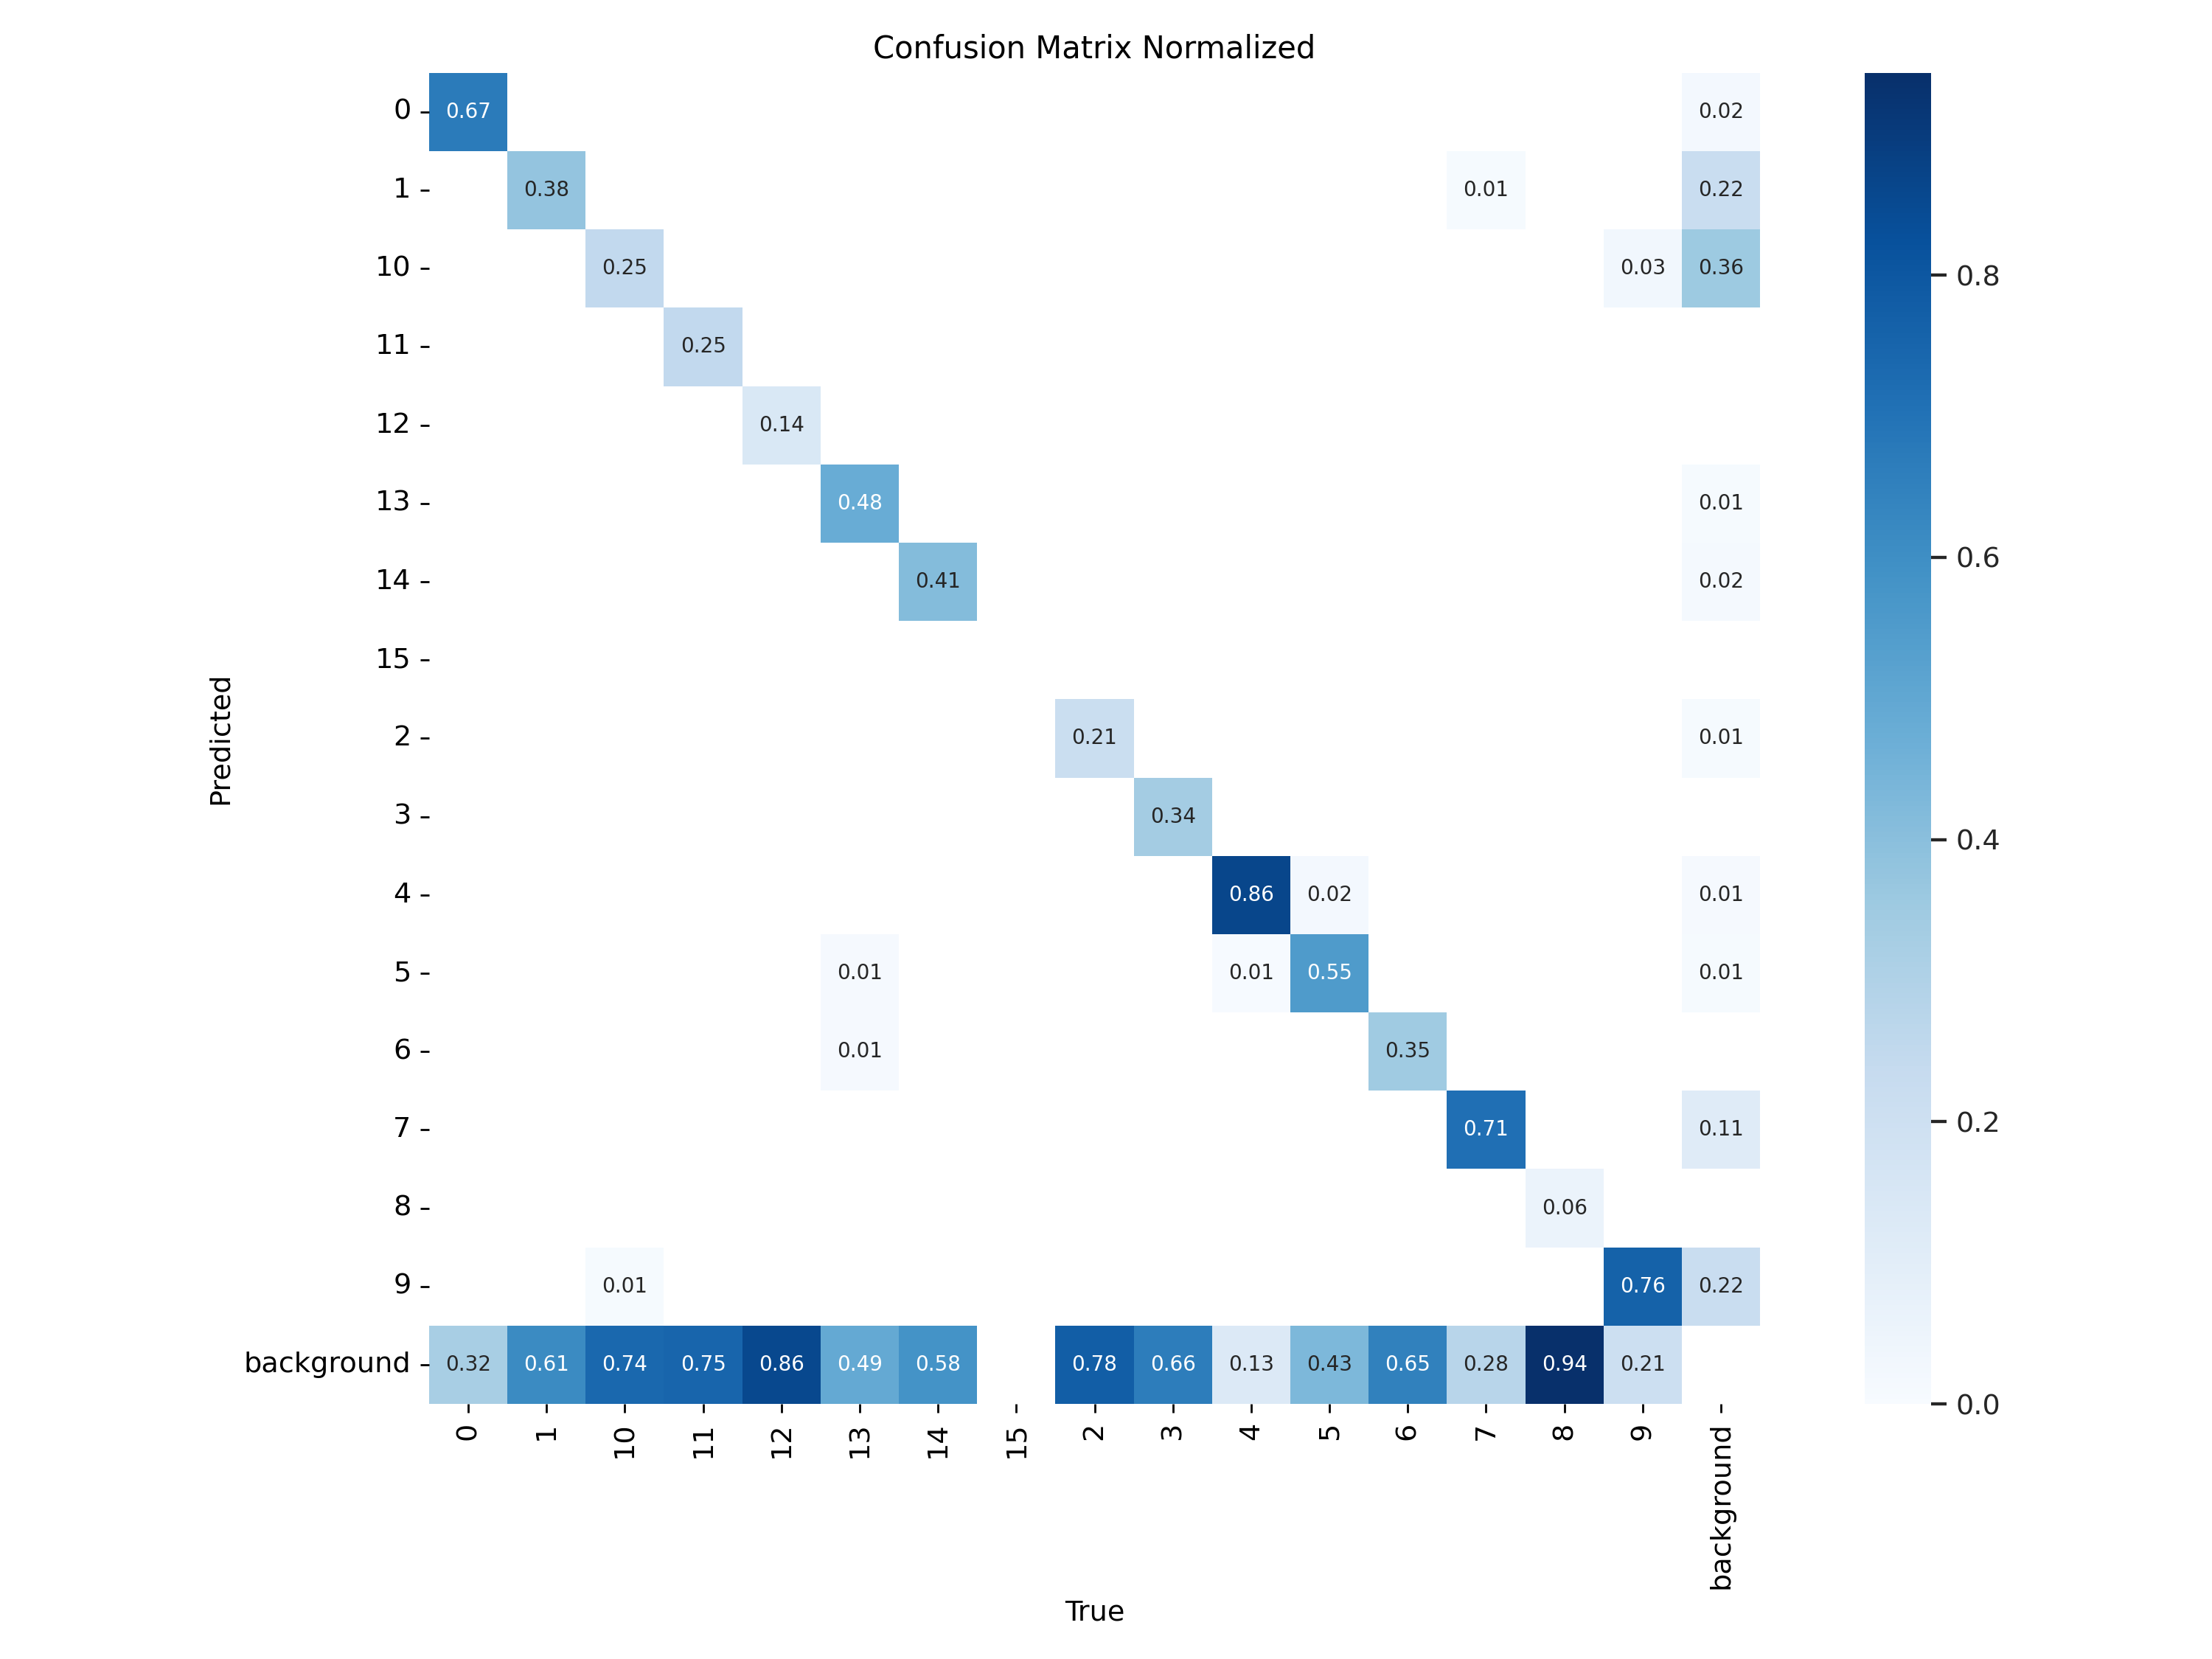

In [42]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/val2/confusion_matrix_normalized.png', width=800)

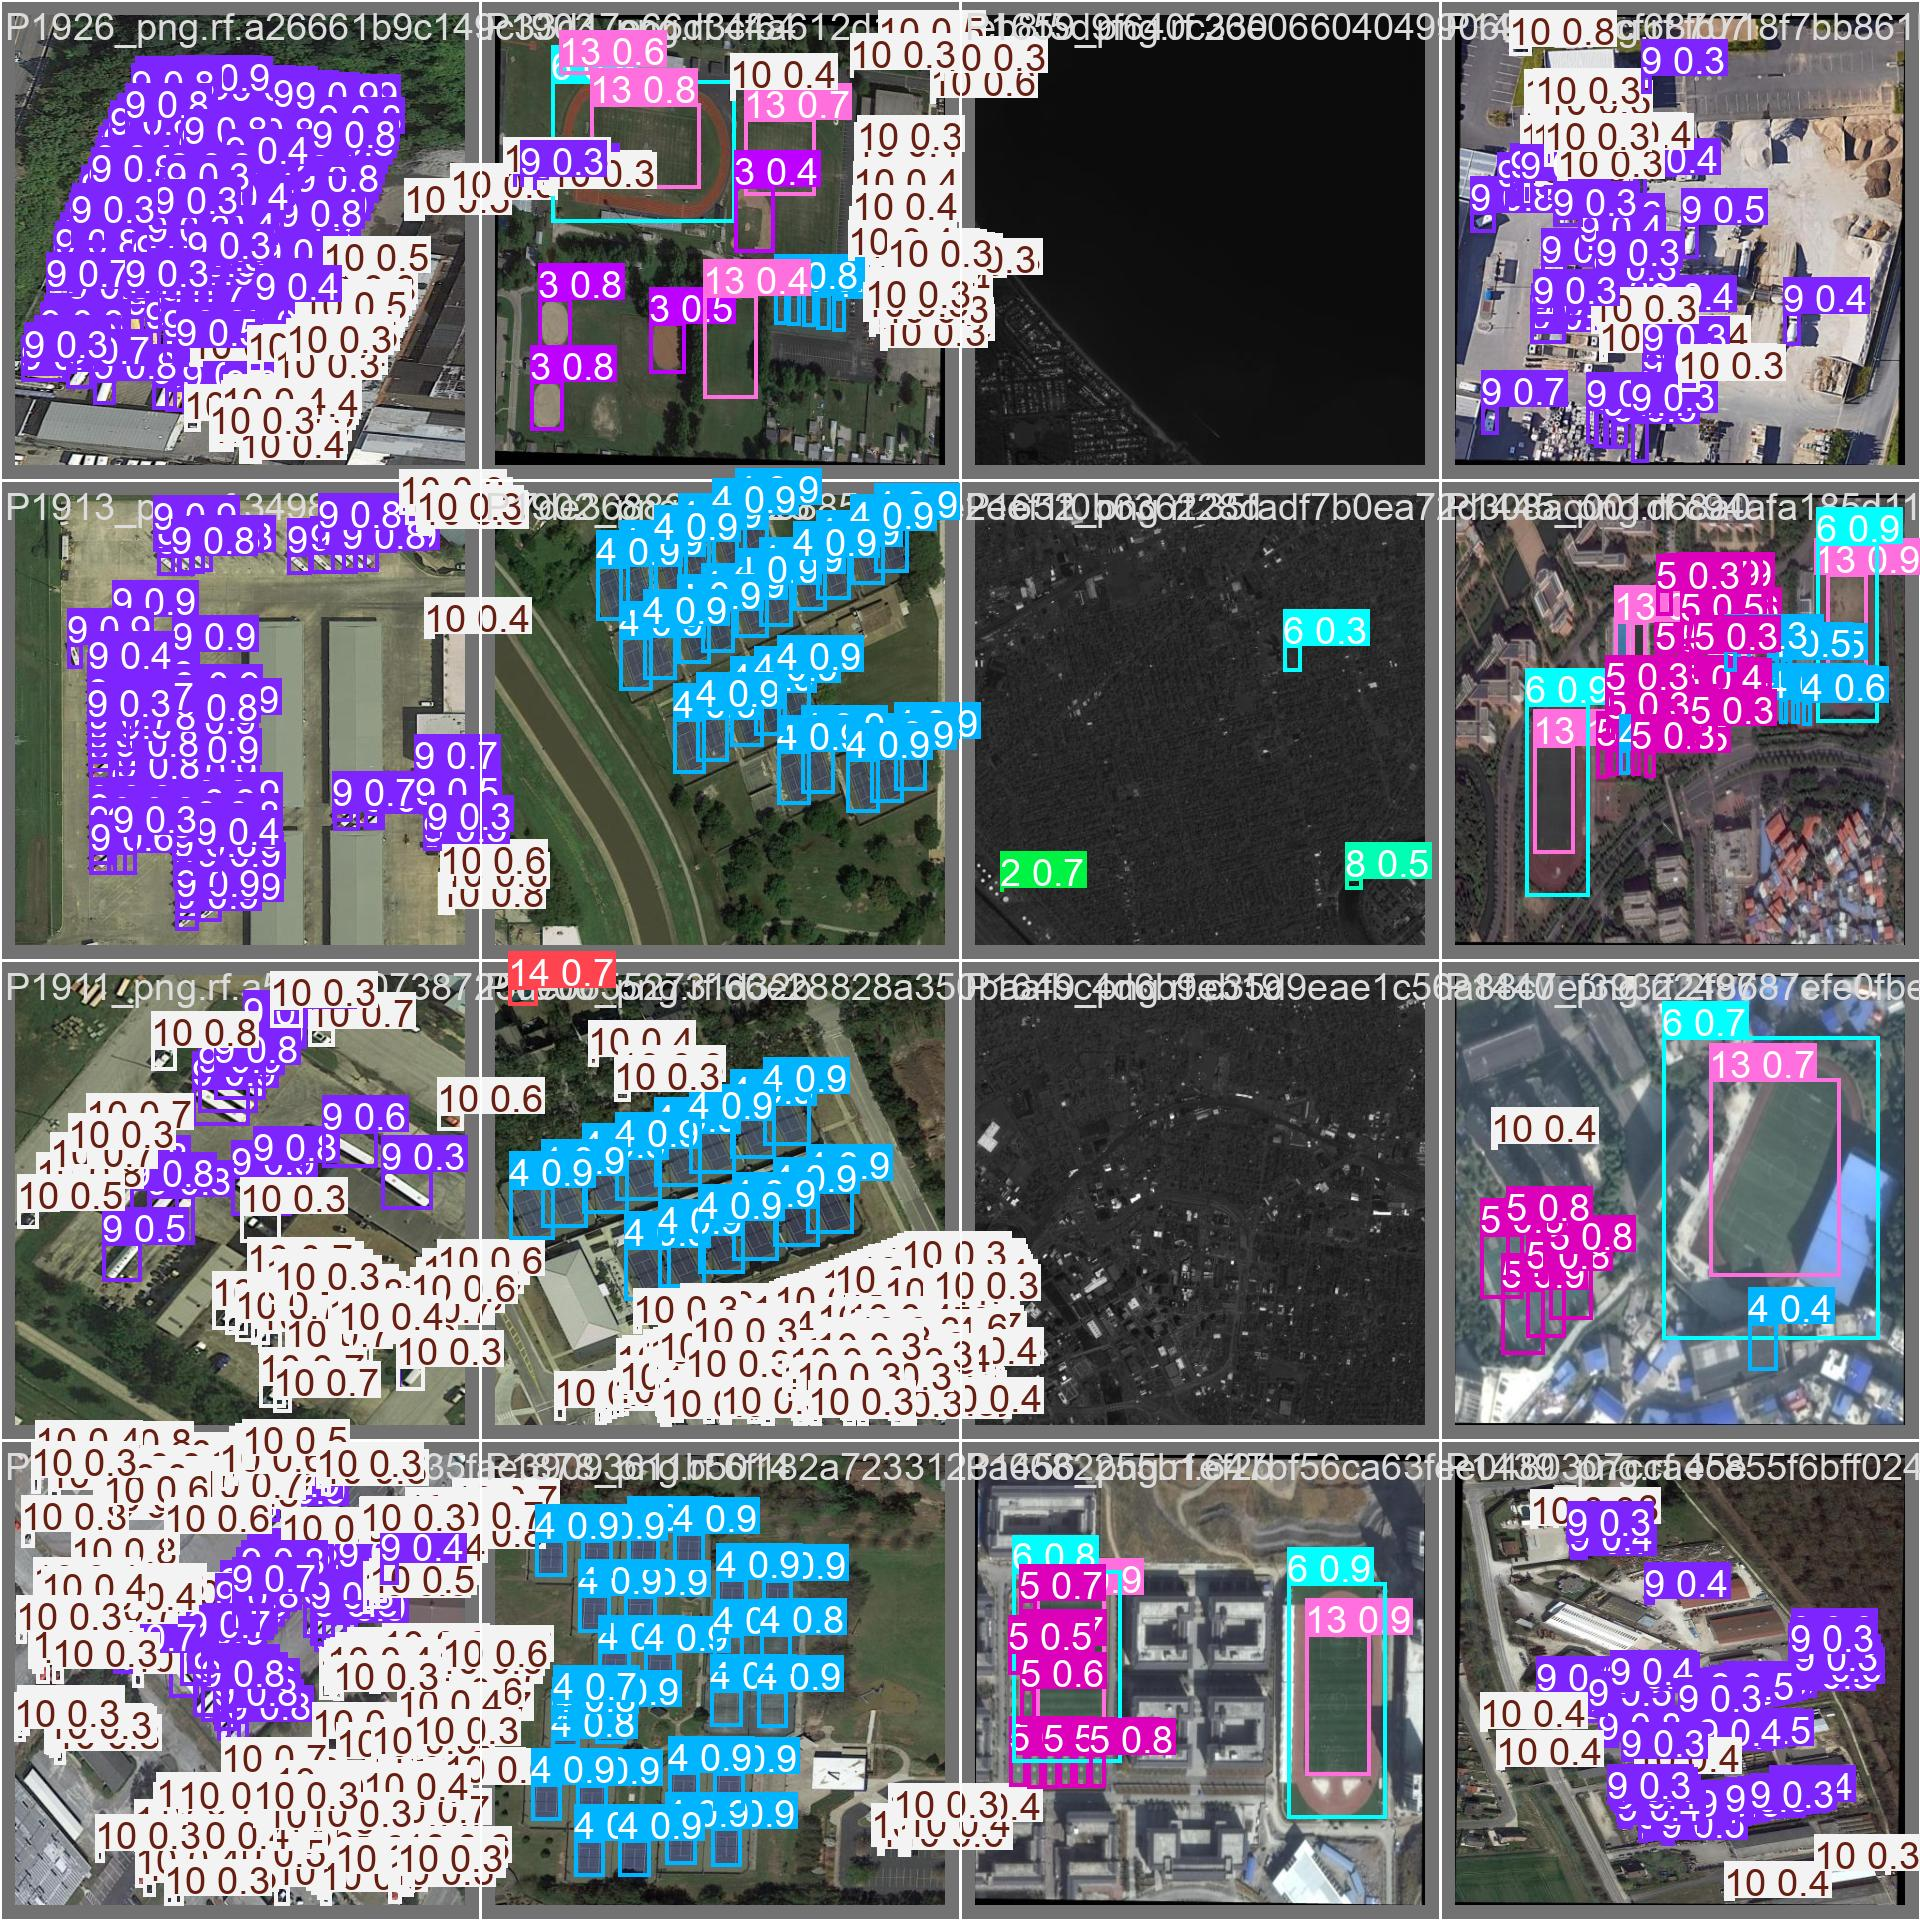

In [45]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/val2/val_batch2_pred.jpg', width=800)